In [1]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.losses import categorical_crossentropy
from keras.models import Model
from keras import Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Average
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.efficientnet_v2 import EfficientNetV2L
from keras.applications.nasnet import NASNetLarge
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet201
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

import inspect
from tqdm import tqdm
import matplotlib.pyplot as plt
from numpy import save


from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from scipy import stats
from statistics import mean
from keras.models import load_model

In [2]:
# data generator with rescale
BATCH_SIZE = 64

train_generator = ImageDataGenerator(rescale=1./255) 

val_generator = ImageDataGenerator(rescale=1./255)

test_generator = ImageDataGenerator(rescale=1./255)


In [3]:
# importing data

train_data_dir = '../mice data/train'
val_data_dir = '../mice data/val'
test_data_dir = '../mice data/test'





traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=BATCH_SIZE,
                                               subset='training',
                                               seed=36)

validgen = val_generator.flow_from_directory(val_data_dir,
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               seed=63)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                             
                                             shuffle=False,
                                             seed=33)

Found 209 images belonging to 3 classes.
Found 99 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [4]:
input_shape = (224, 224, 3)
optimizer = Adam(learning_rate=0.001)
n_classes= len(traingen.class_indices)

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 100
model_input = Input(shape=input_shape)

# Shallow

Defining the models with shallow FC layers

In [5]:
def vgg16_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model




def mobilenet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def inceptionresnet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = InceptionResNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='inceptionresnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model





def xception_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def resnet50_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def nasnetlarge_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    
    return model


# Medium

Defining models with Medium FC layers

In [6]:

def mobilenet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def xception_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg16_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model




def resnet50_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def nasnetlarge_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model




# DNN

Defining the models with DNN FC layers

In [7]:
def xception_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg16_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model



def mobilenet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model








def nasnetlarge_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def resnet50_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model




Loading all the weights from teh training

In [8]:
vgg16_model_shallow = vgg16_shallow(model_input, optimizer)
vgg16_model_shallow.load_weights('tl_model_nonprocessed_vgg16_shallow.weights.best.hdf5')

vgg19_model_shallow = vgg19_shallow(model_input, optimizer)
vgg19_model_shallow.load_weights('tl_model_nonprocessed_vgg19_shallow.weights.best.hdf5')


mobilenet_model_shallow = mobilenet_shallow(model_input, optimizer)
mobilenet_model_shallow.load_weights('tl_model_nonprocessed_mobilenet_shallow.weights.best.hdf5')

xception_model_shallow = xception_shallow(model_input, optimizer)
xception_model_shallow.load_weights('tl_model_nonprocessed_xception_shallow.weights.best.hdf5')

efficientnet_model_shallow = efficientnet_shallow(model_input, optimizer)
efficientnet_model_shallow.load_weights('tl_model_nonprocessed_efficientnet_shallow.weights.best.hdf5')

resnet_model_shallow = resnet50_shallow(model_input, optimizer)
resnet_model_shallow.load_weights('tl_model_nonprocessed_resnet50_shallow.weights.best.hdf5')



nasnetlarge_model_shallow = nasnetlarge_shallow(model_input, optimizer)
nasnetlarge_model_shallow.load_weights('tl_model_nonprocessed_nasnetlarge_shallow.weights.best.hdf5')



####################################### medium ############################################

vgg16_model_medium = vgg16_medium(model_input, optimizer)
vgg16_model_medium.load_weights('tl_model_nonprocessed_vgg16_medium.weights.best.hdf5')

vgg19_model_medium = vgg19_medium(model_input, optimizer)
vgg19_model_medium.load_weights('tl_model_nonprocessed_vgg19_medium.weights.best.hdf5')



mobilenet_model_medium = mobilenet_medium(model_input, optimizer)
mobilenet_model_medium.load_weights('tl_model_nonprocessed_mobilenet_medium.weights.best.hdf5')

xception_model_medium = xception_medium(model_input, optimizer)
xception_model_medium.load_weights('tl_model_nonprocessed_xception_medium.weights.best.hdf5')

efficientnet_model_medium = efficientnet_medium(model_input, optimizer)
efficientnet_model_medium.load_weights('tl_model_nonprocessed_efficientnet_medium.weights.best.hdf5')

resnet_model_medium = resnet50_medium(model_input, optimizer)
resnet_model_medium.load_weights('tl_model_nonprocessed_resnet50_medium.weights.best.hdf5')



nasnetlarge_model_medium = nasnetlarge_medium(model_input, optimizer)
nasnetlarge_model_medium.load_weights('tl_model_nonprocessed_nasnetlarge_medium.weights.best.hdf5')




################################## dnn ############################
vgg16_model_dnn = vgg16_dnn(model_input, optimizer)
vgg16_model_dnn.load_weights('tl_model_nonprocessed_vgg16_dnn.weights.best.hdf5')

vgg19_model_dnn = vgg19_dnn(model_input, optimizer)
vgg19_model_dnn.load_weights('tl_model_nonprocessed_vgg19_dnn.weights.best.hdf5')


mobilenet_model_dnn = mobilenet_dnn(model_input, optimizer)
mobilenet_model_dnn.load_weights('tl_model_nonprocessed_mobilenet_dnn.weights.best.hdf5')


xception_model_dnn = xception_dnn(model_input, optimizer)
xception_model_dnn.load_weights('tl_model_nonprocessed_xception_dnn.weights.best.hdf5')

efficientnet_model_dnn = efficientnet_dnn(model_input, optimizer)
efficientnet_model_dnn.load_weights('tl_model_nonprocessed_efficientnet_dnn.weights.best.hdf5')

resnet_model_dnn = resnet50_dnn(model_input, optimizer)
resnet_model_dnn.load_weights('tl_model_nonprocessed_resnet50_dnn.weights.best.hdf5')



nasnetlarge_model_dnn = nasnetlarge_dnn(model_input, optimizer)
nasnetlarge_model_dnn.load_weights('tl_model_nonprocessed_nasnetlarge_dnn.weights.best.hdf5')



In [10]:
class GeneticAlgorithm:
    def __init__(self, 
                 n_genes,
                 n_iterations,
                 lchrom, 
                 pcross, 
                 pmutation, 
                 crossover_type, 
                 mutation_type, 
                 selection_type, 
                 cut_point,
                 popsize, 
                 n_elites,
                 models,
                 n_classes,
                 traingen,
                 validgen,
                 n_steps,
                 n_val_steps,
                 n_epochs,
                 random_state = 123):
        

        self.n_genes = n_genes
        self.lchrom = lchrom
        self.popsize = popsize
        self.pcross = pcross
        self.pmutation = pmutation
        self.crossover_type = crossover_type
        self.mutation_type = mutation_type
        self.selection_type = selection_type
        self.random_state = random_state
        self.n_iterations = n_iterations
        self.n_elites = n_elites
        self.best_fitness_evolution = []
        self.cut_point = cut_point
        self.models = models
        self.n_classes = n_classes
        self.traingen = traingen
        self.validgen = validgen
        self.batch_size = 32
        self.input_shape = (32, 32, 3)
        self.n_steps = n_steps
        self.n_val_steps = n_val_steps
        self.n_epochs = n_epochs
    
        pop = []
        while (len(pop) < self.popsize):
            chromosome = np.random.randint(2, size= self.n_genes)
            if (sum(chromosome[:self.cut_point]) > 0 and sum(chromosome[self.cut_point:]) == 1 ):
                pop.append(chromosome)

            
        # Convert pop to list of solutions
        self.population = [tuple(x) for x in pop]

        
        
        
    def fitness_func(self, solution, cut_point):
        
        models = []
        
        input_shape = (224, 224, 3)
        model_input = Input(shape=input_shape)
        
        # first, define the three meta learners
        
        for i in range(cut_point, len(solution)):
            if (solution[i]):
            
                if i == 7:
                    # 1. shallow fully connected layers
                    for j in range(cut_point):
                        if (solution[j]):
                            if j == 0:
                                models.append(vgg16_model_shallow)
                            
                            
                            if j == 1:
                                models.append(vgg19_model_shallow)
                            
                            
                            if j == 2:
                                models.append(xception_model_shallow)
                            
                            if j == 3:
                                models.append(mobilenet_model_shallow)

                            if j == 4:
                                models.append(resnet_model_shallow)

                            if j == 5:
                                models.append(efficientnet_model_shallow)
                            if j == 6:
                                models.append(nasnetlarge_model_shallow)

                            
                            
                
                if i == 8:
                    
                    # 2. medium size fully connected layers
                    for j in range(cut_point):
                        if (solution[j]):
                            if j == 0:
                                models.append(vgg16_model_medium)
                                
                                
                            if j == 1:
                                models.append(vgg19_model_medium)
                            
                                
                            if j == 2:
                                models.append(xception_model_medium)
                            
                            if j == 3:
                                models.append(mobilenet_model_medium)

                            if j == 4:
                                models.append(resnet_model_medium)

                            if j == 5:
                                models.append(efficientnet_model_medium)
                            if j == 6:
                                models.append(nasnetlarge_model_medium)

                            
                    
                    
                if i == 9:
                    # 3. DNN FC 
                    for j in range(cut_point):

                        if (solution[j]):

                            if j == 0:
                                models.append(vgg16_model_dnn)
                                    
                                    
                            if j == 1:
                                models.append(vgg19_model_dnn)
                            
                            
                            if j == 2:
                                models.append(xception_model_dnn)

                            if j == 3:
                                models.append(mobilenet_model_dnn)

                            if j == 4:
                                models.append(resnet_model_dnn)

                            if j == 5:
                                models.append(efficientnet_model_dnn)
                            if j == 6:
                                models.append(nasnetlarge_model_dnn)

                          


        # defining the ensemble model
        model_input = Input(shape=(224, 224, 3))
        model_outputs = [model(model_input) for model in models]
        ensemble_output = Average()(model_outputs)
        ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

        
        optim_1 = Adam(learning_rate=0.001)

        
        
        ensemble_model.compile(optimizer=optim_1, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
        result = ensemble_model.evaluate(validgen)
        
        
        return result[1]

    # calculating the fitness of the generation
    def get_fitness_scores(self):
        scores = [self.fitness_func(sol, self.cut_point) for sol in self.population]
        return np.array(scores)

    def __append_best_score(self, scores):
        best_score = np.max(scores)
        self.best_fitness_evolution.append(best_score)
        return 'Ok'
    
    # rank selecting method
    def __ranking_selection(self, scores):
        ind = np.argsort(scores)

        s = sum(ind)
        t = np.random.rand() * s
        partial_sum = 0
        i=0
        while(partial_sum <t and i <len(scores)):
            partial_sum += scores[i]

        selected = i
        return selected 
    
    # roulette selection
    def __roulette_selection(self, scores):
        s = sum(scores)
        t = np.random.rand() * s
        partial_sum = 0
        i=0
        while(partial_sum <t and i <len(scores)):
            partial_sum += scores[i]

        selected = i
        return selected

    # selecting two chromosomes using an input selection type
    def select(self, scores, selection_type):

        if selection_type not in ['ranking', 'roulette']:
            raise ValueError('Type should be ranking or tournament')

        if selection_type == 'ranking':
            ind = self.__ranking_selection(scores)
        elif selection_type == 'roulette':
            ind = self.__roulette_selection(scores)
        else:
            pass
        return ind

    # flipping a coin to decide whether to call the crossover or mutation function
    def flip(self, p):
        return 1 if np.random.rand() < p else 0
    
    def format_func(self, value):
        return "%.3f" % value

    # crossover
    def __crossover(self, 
                    parent1, 
                    parent2, 
                    crossover_type,
                    pcross,
                    lchrom,
                    mutation_type,
                    pmutation):
        
        if crossover_type not in ['uniform', 'one_point', 'two_point']:
                raise ValueError('crossover_type should be one of uniform, one_point or multi_point')

            
        if self.flip(pcross):
            
            if crossover_type == 'one_point':
                index = np.random.choice(range(1, lchrom)) 

                parent1 = list(parent1)
                parent2 = list(parent2)

                child1 = self.__mutation(parent1[:index] + parent2[index:], mutation_type, pmutation)
                child2 = self.__mutation(parent2[:index] + parent1[index:] , mutation_type, pmutation)
                children = [child1, child2]
            elif crossover_type == 'two_point':
                point1 = np.random.choice(range(1, lchrom)) 
                point2 = np.random.choice(point1, range(lchrom))
                child1 = self.__mutation(parent1[:point1] + parent2[point1: point2] + parent1[point2:], mutation_type, pmutation)
                child2 = self.__mutation(parent2[:point1] + parent1[point1: point2] + parent2[point2:], mutation_type, pmutation)
                children = [child1, child2]
            else:
                t = np.random.rand()
                temp = np.random.rand(lchrom)
                child1 = self.__mutation([parent1[i] if temp[i] > t else parent2[i] for i in range(len(temp)) ], mutation_type, pmutation)
                child2 = self.__mutation([parent2[i] if temp[i] > t else parent1[i] for i in range(len(temp)) ], mutation_type, pmutation)
                children = [child1, child2]
               
        else:
            
            child1 = self.__mutation(parent1, self.mutation_type, pmutation)
            child2 = self.__mutation(parent2, self.mutation_type, pmutation)
            children = [child1, child2]
        
        return children
    

    # mutation
    def __mutation(self, individual, mutation_type, pmutation):

        if mutation_type not in ['bitstring', 'inversion', 'swap']:
            raise ValueError('mutation_type should be one of bitstring or inversion or swap')


        index = np.random.choice(len(individual))
        index2 = np.random.choice(len(individual))
        
        # Convert individual to list so that can be modified
        individual_mod = list(individual)
        if (self.flip(pmutation)):
            
            if mutation_type == 'bitstring':
                individual_mod[index] = 1 - individual_mod[index]
            elif mutation_type == 'inversion':
                individual_mod= individual_mod[0:index] + individual_mod[index2:index-1:-1] + individual_mod[index2+1:]
            else:
                individual_mod[index], individual_mod[index2] = individual_mod[index2], individual_mod[index]
        else:
            
            pass
        
        individual = tuple(individual_mod)

        return individual

    def optimize(self):

        for i in tqdm(range(self.n_iterations)):
            print("iteration number:" , i+1)

            # calculate fitness score
            scores = self.get_fitness_scores()
            #storing scores
            scores_array = [self.format_func(score) for score in scores]
            sfile = open("scores.txt", "a")
            sfile.write(str(scores_array))
            sfile.write("\n")
            sfile.close()
            
            # append best score
            _ = self.__append_best_score(scores)

            # get the result wher he results is the best
            best_score_ind = scores.tolist().index(max(scores))

            best_solution = self.population[best_score_ind]
            # storing best solution
            solutionfile = open("best_solution.txt", "a")
            content = str(best_solution)
            solutionfile.write(content)
            solutionfile.write("\n")
            solutionfile.close()
            print(best_solution)



            best_fitness = np.array(self.best_fitness_evolution)
            # increasing the mutation rate in case the GA is stuck
            if (i>=5):
                if (best_fitness[i-1] == best_fitness[i-2]) \
                and (best_fitness[i-2] == best_fitness[i-3]) and (best_fitness[i-3] == best_fitness[i-4]) and (best_fitness[i-4] == best_fitness[i-5]):
                    self.pmutation = self.pmutation + 0.05

            
            
            fitfile = open("fitness_evolution.txt", "a")
            fit = str(best_fitness)
            fitfile.write(fit)
            fitfile.write("\n")
            fitfile.close()
            print(best_fitness)
            
            # choose the elites of the current population
            ind = np.argsort(scores)
        
            elites = [self.population[i] for i in ind[-self.n_elites:]]

            #append the elites to the population
            new_population = [tuple(elite) for elite in elites]

            # make selection
            j = self.n_elites
            while j < self.popsize:
                
                # select parents from population
                mate1 = self.select(scores, self.selection_type)
                mate2 = self.select(scores, self.selection_type)

                mate1 = tuple(self.population[mate1])
                mate2 = tuple(self.population[mate2])

                #crossover + mutation
                children = self.__crossover(mate1, mate2, self.crossover_type, self.pcross, self.lchrom,self.mutation_type, self.pmutation)
                children = [tuple(child) for child in children]
                
                
                
                if ((sum(children[0][:self.cut_point]) != 0 and sum(children[0][self.cut_point:]) == 1) and
                    sum(children[1][:self.cut_point]) != 0 and sum(children[1][self.cut_point:]) == 1):
                    
                    new_population.append(tuple(children[0]))
                    new_population.append(tuple(children[1]))
                    j+=2
                
                

            self.population = new_population

            
            

        

        
        return (best_solution, self.best_fitness_evolution[-1])


    # run the genetic algorithm
    def view_fitness_evolution(self):
        plt.plot(
            range(len(self.best_fitness_evolution)),
            self.best_fitness_evolution)

In [11]:
models = ["vgg16", "VGG19",
          "ResNet50","DenseNet201"]
ga = GeneticAlgorithm(
    n_genes =10,
    n_iterations = 100,
    lchrom = 10, 
    cut_point = 7, 
    pcross = 0.8, 
    pmutation = 0.2, 
    crossover_type = 'one_point', 
    mutation_type = 'bitstring', 
    selection_type = 'ranking', 
    popsize = 7, 
    n_elites = 1,
    models = models,
    n_classes = n_classes,
    n_epochs=n_epochs,
    n_steps=n_steps,
    n_val_steps=n_val_steps,
    traingen=traingen,
    validgen=validgen,
    random_state = 36
)



In [12]:
ga.population

[(1, 0, 0, 1, 1, 0, 1, 0, 0, 1),
 (0, 0, 0, 1, 0, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 1, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0, 1, 0, 1, 0),
 (1, 1, 1, 1, 1, 1, 0, 0, 1, 0),
 (0, 0, 1, 0, 1, 1, 1, 0, 1, 0),
 (0, 0, 0, 0, 1, 0, 1, 0, 1, 0)]

  0%|          | 0/100 [00:00<?, ?it/s]

iteration number: 1
2/2 [==============================] - 19s 5s/step - loss: 0.7253 - accuracy: 0.4141


  1%|          | 1/100 [03:36<5:56:56, 216.33s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.45454547]
iteration number: 2
2/2 [==============================] - 50s 15s/step - loss: 0.7168 - accuracy: 0.4545


  2%|▏         | 2/100 [08:44<7:21:28, 270.29s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547]
iteration number: 3
2/2 [==============================] - 78s 23s/step - loss: 0.6796 - accuracy: 0.4545


  3%|▎         | 3/100 [14:43<8:22:29, 310.82s/it]

(1, 0, 0, 1, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547]
iteration number: 4
2/2 [==============================] - 49s 15s/step - loss: 0.7168 - accuracy: 0.4545


  4%|▍         | 4/100 [21:02<9:00:18, 337.69s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949]
iteration number: 5
2/2 [==============================] - 103s 32s/step - loss: 0.6796 - accuracy: 0.4545


  5%|▌         | 5/100 [31:15<11:31:53, 436.99s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949]
iteration number: 6
2/2 [==============================] - 63s 20s/step - loss: 0.6920 - accuracy: 0.4949


  6%|▌         | 6/100 [39:14<11:47:08, 451.37s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949]
iteration number: 7
2/2 [==============================] - 63s 20s/step - loss: 0.6920 - accuracy: 0.4949


  7%|▋         | 7/100 [46:35<11:34:03, 447.77s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 8
2/2 [==============================] - 78s 26s/step - loss: 0.6920 - accuracy: 0.4949


  8%|▊         | 8/100 [55:14<12:01:32, 470.57s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 9
2/2 [==============================] - 79s 26s/step - loss: 0.6920 - accuracy: 0.4949


  9%|▉         | 9/100 [1:03:25<12:03:23, 476.96s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 10
2/2 [==============================] - 65s 21s/step - loss: 0.6920 - accuracy: 0.4949


 10%|█         | 10/100 [1:12:47<12:35:03, 503.38s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 11
2/2 [==============================] - 84s 28s/step - loss: 0.6920 - accuracy: 0.4949


 11%|█         | 11/100 [1:22:15<12:55:43, 522.96s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 12
2/2 [==============================] - 81s 27s/step - loss: 0.6747 - accuracy: 0.4848


 12%|█▏        | 12/100 [1:32:03<13:15:53, 542.66s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 13
2/2 [==============================] - 83s 27s/step - loss: 0.6920 - accuracy: 0.4949


 13%|█▎        | 13/100 [1:41:20<13:13:20, 547.13s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 14
2/2 [==============================] - 87s 29s/step - loss: 0.6920 - accuracy: 0.4949


 14%|█▍        | 14/100 [1:51:33<13:32:48, 567.08s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 15
2/2 [==============================] - 87s 29s/step - loss: 0.6920 - accuracy: 0.4949


 15%|█▌        | 15/100 [2:02:14<13:54:43, 589.22s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 16
2/2 [==============================] - 88s 29s/step - loss: 0.6920 - accuracy: 0.4949


 16%|█▌        | 16/100 [2:13:50<14:30:15, 621.61s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 17
2/2 [==============================] - 86s 28s/step - loss: 0.6920 - accuracy: 0.4949


 17%|█▋        | 17/100 [2:25:46<14:59:07, 649.97s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 18
2/2 [==============================] - 124s 40s/step - loss: 0.6579 - accuracy: 0.4848


 18%|█▊        | 18/100 [2:36:47<14:52:29, 653.04s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 19
2/2 [==============================] - 89s 30s/step - loss: 0.6920 - accuracy: 0.4949


 19%|█▉        | 19/100 [2:48:01<14:50:24, 659.56s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 20
2/2 [==============================] - 94s 31s/step - loss: 0.6920 - accuracy: 0.4949


 20%|██        | 20/100 [2:59:02<14:39:56, 659.95s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 21
2/2 [==============================] - 90s 30s/step - loss: 0.6920 - accuracy: 0.4949


 21%|██        | 21/100 [3:10:17<14:34:37, 664.27s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 22
2/2 [==============================] - 92s 31s/step - loss: 0.6920 - accuracy: 0.4949


 22%|██▏       | 22/100 [3:22:02<14:39:27, 676.51s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 23
2/2 [==============================] - 53s 17s/step - loss: 0.7095 - accuracy: 0.3939


 23%|██▎       | 23/100 [3:33:54<14:42:05, 687.35s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 24
2/2 [==============================] - 123s 41s/step - loss: 0.6920 - accuracy: 0.4949


 24%|██▍       | 24/100 [3:48:59<15:53:27, 752.73s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 25
2/2 [==============================] - 79s 26s/step - loss: 1.2198 - accuracy: 0.4545


 25%|██▌       | 25/100 [4:02:06<15:53:39, 762.93s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 26
2/2 [==============================] - 103s 34s/step - loss: 0.7168 - accuracy: 0.4545


 26%|██▌       | 26/100 [4:12:53<14:58:02, 728.14s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 27
2/2 [==============================] - 61s 21s/step - loss: 1.7631 - accuracy: 0.4848


 27%|██▋       | 27/100 [4:25:24<14:54:06, 734.89s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 28
2/2 [==============================] - 147s 52s/step - loss: 0.7473 - accuracy: 0.4141


 28%|██▊       | 28/100 [4:38:15<14:55:04, 745.90s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 29
2/2 [==============================] - 157s 53s/step - loss: 0.7127 - accuracy: 0.4040


 29%|██▉       | 29/100 [4:54:24<16:01:44, 812.74s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 30
2/2 [==============================] - 248s 84s/step - loss: 0.6579 - accuracy: 0.4848


 30%|███       | 30/100 [5:16:39<18:50:53, 969.34s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 31
2/2 [==============================] - 75s 25s/step - loss: 0.6811 - accuracy: 0.3333


 31%|███       | 31/100 [5:34:49<19:16:36, 1005.74s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 32
2/2 [==============================] - 193s 66s/step - loss: 0.6708 - accuracy: 0.4949


 32%|███▏      | 32/100 [5:50:55<18:46:05, 993.60s/it] 

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 33
2/2 [==============================] - 335s 117s/step - loss: 0.7069 - accuracy: 0.3434


 33%|███▎      | 33/100 [6:16:51<21:37:54, 1162.31s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 34
2/2 [==============================] - 118s 40s/step - loss: 0.6807 - accuracy: 0.3333


 34%|███▍      | 34/100 [6:41:43<23:07:19, 1261.21s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 35
2/2 [==============================] - 332s 121s/step - loss: 0.7473 - accuracy: 0.4141


 35%|███▌      | 35/100 [7:05:19<23:36:37, 1307.65s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 36
2/2 [==============================] - 104s 34s/step - loss: 0.6811 - accuracy: 0.3333


 36%|███▌      | 36/100 [7:31:51<24:45:55, 1393.05s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 37
2/2 [==============================] - 146s 48s/step - loss: 0.7095 - accuracy: 0.3939


 37%|███▋      | 37/100 [8:04:43<27:25:00, 1566.67s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 38
2/2 [==============================] - 178s 65s/step - loss: 0.7030 - accuracy: 0.4949


 38%|███▊      | 38/100 [8:40:57<30:07:22, 1749.08s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 39
2/2 [==============================] - 241s 85s/step - loss: 0.7030 - accuracy: 0.4949


 39%|███▉      | 39/100 [9:19:08<32:23:29, 1911.64s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 40
2/2 [==============================] - 363s 127s/step - loss: 0.6708 - accuracy: 0.4949


 40%|████      | 40/100 [9:48:00<30:57:28, 1857.48s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 41
2/2 [==============================] - 473s 165s/step - loss: 0.7473 - accuracy: 0.4141


 41%|████      | 41/100 [10:13:49<28:55:35, 1765.00s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 42
2/2 [==============================] - 594s 208s/step - loss: 0.7069 - accuracy: 0.3434


 42%|████▏     | 42/100 [11:12:43<36:59:06, 2295.62s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 43
2/2 [==============================] - 373s 128s/step - loss: 0.7127 - accuracy: 0.4040


 43%|████▎     | 43/100 [11:47:12<35:16:18, 2227.70s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 44
2/2 [==============================] - 322s 110s/step - loss: 0.7709 - accuracy: 0.3939


 44%|████▍     | 44/100 [12:19:37<33:20:09, 2143.04s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 45
2/2 [==============================] - 277s 97s/step - loss: 0.7199 - accuracy: 0.3737


 45%|████▌     | 45/100 [12:54:23<32:28:37, 2125.77s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 46
2/2 [==============================] - 665s 233s/step - loss: 0.6867 - accuracy: 0.4747


 46%|████▌     | 46/100 [13:51:44<37:48:22, 2520.42s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 47
2/2 [==============================] - 374s 129s/step - loss: 0.7127 - accuracy: 0.4040


 47%|████▋     | 47/100 [14:25:13<34:50:46, 2366.91s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 48
2/2 [==============================] - 186s 66s/step - loss: 1.7631 - accuracy: 0.4848


 48%|████▊     | 48/100 [15:05:28<34:23:47, 2381.30s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 49
2/2 [==============================] - 356s 124s/step - loss: 0.7198 - accuracy: 0.3737


 49%|████▉     | 49/100 [15:53:46<35:56:01, 2536.50s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 50
2/2 [==============================] - 668s 234s/step - loss: 0.6867 - accuracy: 0.4747


 50%|█████     | 50/100 [16:50:26<38:49:39, 2795.60s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 51
2/2 [==============================] - 496s 172s/step - loss: 0.6579 - accuracy: 0.4848


 51%|█████     | 51/100 [17:44:34<39:53:51, 2931.25s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 52
2/2 [==============================] - 497s 173s/step - loss: 0.6579 - accuracy: 0.4848


 52%|█████▏    | 52/100 [18:24:10<36:51:40, 2764.59s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 53
2/2 [==============================] - 381s 134s/step - loss: 0.7127 - accuracy: 0.4040


 53%|█████▎    | 53/100 [19:05:21<34:56:34, 2676.49s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 54
2/2 [==============================] - 474s 167s/step - loss: 0.7473 - accuracy: 0.4141


 54%|█████▍    | 54/100 [19:47:28<33:37:42, 2631.79s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 55
2/2 [==============================] - 329s 115s/step - loss: 0.7709 - accuracy: 0.3939


 55%|█████▌    | 55/100 [20:32:13<33:05:48, 2647.75s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 56
2/2 [==============================] - 206s 70s/step - loss: 0.6807 - accuracy: 0.3333


 56%|█████▌    | 56/100 [21:07:26<30:24:04, 2487.36s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 57
2/2 [==============================] - 272s 93s/step - loss: 0.7069 - accuracy: 0.3939


 57%|█████▋    | 57/100 [21:53:17<30:39:10, 2566.30s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 58
2/2 [==============================] - 389s 137s/step - loss: 0.6708 - accuracy: 0.4949


 58%|█████▊    | 58/100 [22:38:18<30:24:47, 2606.83s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 59
2/2 [==============================] - 475s 165s/step - loss: 0.6897 - accuracy: 0.4949


 59%|█████▉    | 59/100 [23:14:54<28:17:08, 2483.62s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 60
2/2 [==============================] - 401s 141s/step - loss: 0.7127 - accuracy: 0.4040


 60%|██████    | 60/100 [23:58:22<28:00:35, 2520.89s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 61
2/2 [==============================] - 338s 118s/step - loss: 1.2198 - accuracy: 0.4545


 61%|██████    | 61/100 [24:50:51<29:20:58, 2709.20s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 62
2/2 [==============================] - 387s 136s/step - loss: 0.7198 - accuracy: 0.3737


 62%|██████▏   | 62/100 [25:32:02<27:50:34, 2637.74s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 63
2/2 [==============================] - 191s 68s/step - loss: 1.7631 - accuracy: 0.4848


 63%|██████▎   | 63/100 [26:17:17<27:20:54, 2660.93s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 64
2/2 [==============================] - 501s 173s/step - loss: 0.6832 - accuracy: 0.3737


 64%|██████▍   | 64/100 [26:57:10<25:48:19, 2580.53s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 65
2/2 [==============================] - 577s 202s/step - loss: 0.6579 - accuracy: 0.4848


 65%|██████▌   | 65/100 [28:00:23<28:37:35, 2944.43s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 66
2/2 [==============================] - 62s 23s/step - loss: 0.6804 - accuracy: 0.3333


 66%|██████▌   | 66/100 [28:37:57<25:51:05, 2737.23s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 67
2/2 [==============================] - 196s 69s/step - loss: 1.7631 - accuracy: 0.4848


 67%|██████▋   | 67/100 [29:14:41<23:37:29, 2577.27s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 68
2/2 [==============================] - 380s 133s/step - loss: 0.7016 - accuracy: 0.4949


 68%|██████▊   | 68/100 [30:06:16<24:17:21, 2732.55s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 69
2/2 [==============================] - 447s 158s/step - loss: 0.7127 - accuracy: 0.4040


 69%|██████▉   | 69/100 [30:48:58<23:05:18, 2681.25s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 70
2/2 [==============================] - 372s 131s/step - loss: 0.7709 - accuracy: 0.3939


 70%|███████   | 70/100 [31:34:34<22:28:57, 2697.90s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 71
2/2 [==============================] - 424s 150s/step - loss: 0.6708 - accuracy: 0.4949


 71%|███████   | 71/100 [32:18:40<21:36:20, 2682.10s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 72
2/2 [==============================] - 486s 172s/step - loss: 0.7127 - accuracy: 0.4040


 72%|███████▏  | 72/100 [33:15:50<22:36:26, 2906.64s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 73
2/2 [==============================] - 290s 103s/step - loss: 0.7030 - accuracy: 0.4949


 73%|███████▎  | 73/100 [34:14:04<23:07:16, 3082.82s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 74
2/2 [==============================] - 68s 25s/step - loss: 0.6804 - accuracy: 0.3333


 74%|███████▍  | 74/100 [34:49:11<20:09:04, 2790.16s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 75
2/2 [==============================] - 424s 150s/step - loss: 0.6920 - accuracy: 0.4949


 75%|███████▌  | 75/100 [35:37:47<19:38:15, 2827.81s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 76
2/2 [==============================] - 68s 25s/step - loss: 0.6804 - accuracy: 0.3333


 76%|███████▌  | 76/100 [36:16:44<17:52:13, 2680.56s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 77
2/2 [==============================] - 472s 167s/step - loss: 0.6747 - accuracy: 0.4848


 77%|███████▋  | 77/100 [37:04:59<17:32:09, 2744.77s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 78
2/2 [==============================] - 519s 182s/step - loss: 0.6747 - accuracy: 0.4848

 78%|███████▊  | 78/100 [38:01:34<17:57:58, 2939.95s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 79
2/2 [==============================] - 309s 110s/step - loss: 0.7720 - accur

 79%|███████▉  | 79/100 [38:45:10<16:35:00, 2842.88s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 80
2/2 [==============================] - 569s 201s/step - loss: 0.

 80%|████████  | 80/100 [39:26:31<15:11:25, 2734.27s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iteration number: 81
2/2 [==============================] - 238s 84s/step 

 81%|████████  | 81/100 [40:06:08<13:51:51, 2626.90s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949]
iteration number: 82
2/2 [==============================] - 437

 82%|████████▏ | 82/100 [40:45:58<12:46:44, 2555.82s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 83
2/2 [==========================

 83%|████████▎ | 83/100 [41:13:25<10:46:55, 2283.26s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 84
2/2 [===============

 84%|████████▍ | 84/100 [41:55:26<10:27:52, 2354.54s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949]
iteration number: 85
2/2 [====

 85%|████████▌ | 85/100 [42:58:52<11:37:31, 2790.13s/it]

(1, 0, 0, 0, 1, 0, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949]
iteration number: 

 86%|████████▌ | 86/100 [43:46:13<10:54:36, 2805.45s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949]
iterati

 87%|████████▋ | 87/100 [44:38:45<10:30:20, 2909.28s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 88%|████████▊ | 88/100 [45:39:36<10:26:20, 3131.74s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 89%|████████▉ | 89/100 [46:59:21<11:05:05, 3627.78s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 90%|█████████ | 90/100 [48:11:52<10:40:48, 3844.87s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 91%|█████████ | 91/100 [49:17:53<9:41:56, 3879.65s/it] 

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 92%|█████████▏| 92/100 [50:20:52<8:33:15, 3849.38s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 93%|█████████▎| 93/100 [51:26:31<7:32:13, 3876.28s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 94%|█████████▍| 94/100 [52:32:47<6:30:37, 3906.25s/it]

(1, 0, 0, 0, 0, 1, 1, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 95%|█████████▌| 95/100 [54:06:32<6:08:29, 4421.82s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 96%|█████████▌| 96/100 [55:18:23<4:52:34, 4388.67s/it]

(1, 0, 0, 0, 0, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 97%|█████████▋| 97/100 [56:24:05<3:32:43, 4254.50s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 98%|█████████▊| 98/100 [57:17:10<2:11:07, 3933.85s/it]

(1, 0, 0, 0, 1, 1, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

 99%|█████████▉| 99/100 [58:24:53<1:06:12, 3972.49s/it]

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

100%|██████████| 100/100 [59:18:48<00:00, 2135.28s/it] 

(1, 0, 0, 0, 1, 0, 0, 0, 0, 1)
[0.45454547 0.45454547 0.45454547 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949 0.49494949
 0.49494949 0.49494949 0.494949

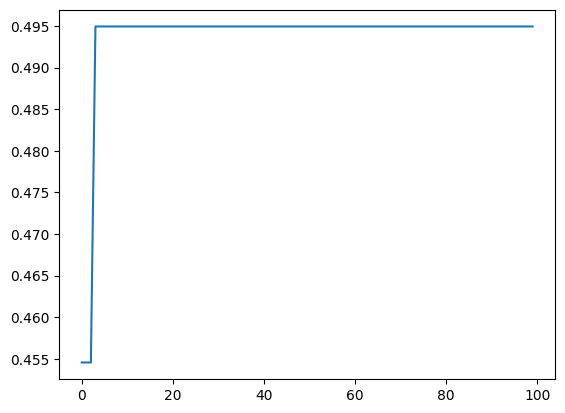

In [13]:
print(ga.optimize())
ga.view_fitness_evolution()

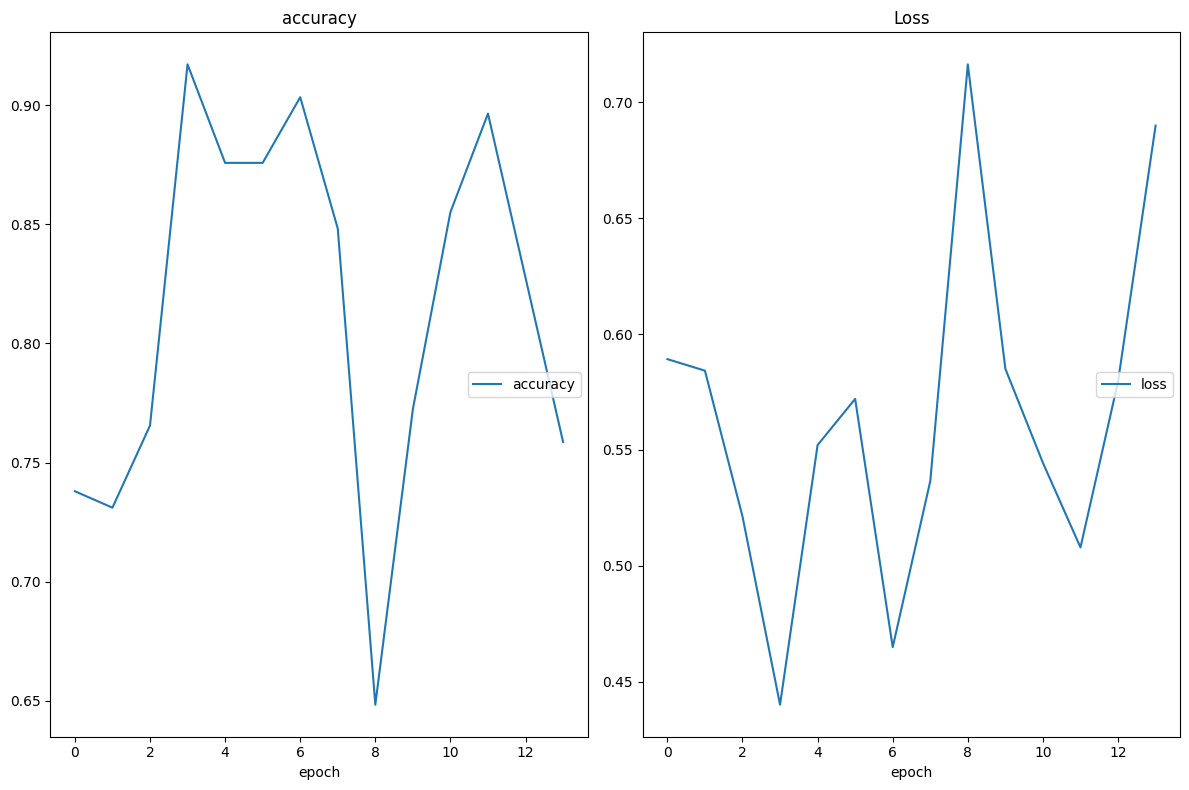

accuracy
	accuracy         	 (min:    0.648, max:    0.917, cur:    0.759)
Loss
	loss             	 (min:    0.440, max:    0.716, cur:    0.690)
3/3 [==============================] - 18s 7s/step - loss: 0.6899 - accuracy: 0.7586


In [9]:
# training the ensemble on the training data
models1 = [vgg19_model_dnn, resnet_model_dnn]
model_input = Input(shape=(224,224,3))
model_outputs = [model(model_input) for model in models1]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

plot_loss_ensemble1 = PlotLossesCallback()

# ModelCheckpoint callback - save best weights
tl_checkpoint_ensemble1 = ModelCheckpoint(filepath='tl_model_mice_ensemble1_dnn.weights.best.hdf5',
                                      monitor='loss',
                                save_best_only=True,
                                save_weights_only=True,
                                verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='loss',
                        patience=10,
                        restore_best_weights=True,
                        mode='min')
optim_1 = Adam(learning_rate=0.001)

ensemble_model.compile(optimizer=optim_1, 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

ensemble_history = ensemble_model.fit(traingen,
        batch_size=BATCH_SIZE,
        epochs= n_epochs,
        shuffle= True,
        steps_per_epoch=n_steps,
        callbacks=[tl_checkpoint_ensemble1, early_stop, plot_loss_ensemble1],
        verbose=1)







Predicting on unseen data

In [10]:
y_prob = ensemble_model.predict(testgen)
y_pred = y_prob.argmax(axis = -1)

1/1 [==============================] - 3s 3s/step


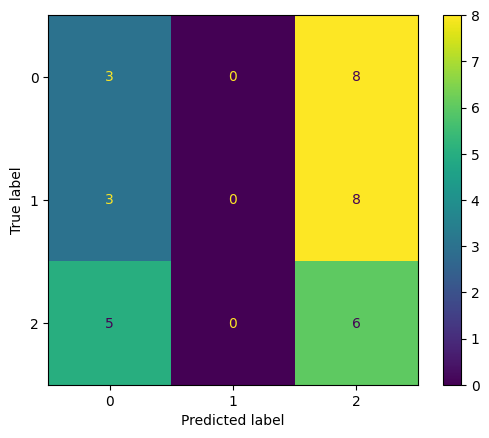

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testgen.classes, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [12]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score, roc_auc_score
y_test = testgen.classes
acc = accuracy_score(y_pred, y_test)
balanced_acc = balanced_accuracy_score(y_pred, y_test)

#auc = roc_auc_score(y_score = y_pred, y_true = y_test, multi_class="ovr")
precision = np.diag(cm) / np.sum(cm, axis = 0)
def sensitivity(y_true,y_pred):
        cm=confusion_matrix(y_true, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        return np.mean(Sensitivity)

sens = sensitivity(y_test, y_pred)
def specificity(y_true,y_pred):
        cm=confusion_matrix(y_true, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)
specif= specificity(y_test, y_pred)

f1 = 2 * (precision * sens) / (precision + sens)

c:\Users\manel.benabid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\manel.benabid\AppData\Local\Temp\ipykernel_17952\1359896249.py:7: RuntimeWarning: invalid value encountered in divide
  precision = np.diag(cm) / np.sum(cm, axis = 0)


In [13]:
import math
g_mean = math.sqrt(sens * specif)

In [14]:
data = {
    "accuracy" : acc,
    "balanced_acc" : balanced_acc,
    "precision": precision,
    "f1": f1,
    "sensitivity": sens,
    "specificity": specif,
    "g_mean": g_mean
}
print(data)

{'accuracy': 0.2727272727272727, 'balanced_acc': 0.2727272727272727, 'precision': array([0.27272727,        nan, 0.27272727]), 'f1': array([0.27272727,        nan, 0.27272727]), 'sensitivity': 0.2727272727272727, 'specificity': 0.6363636363636364, 'g_mean': 0.41659779045053086}
